In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from processing import biosppy_processing, nk_processing, processing_aggregate
from time_domain import time
from frequency_domain import frequency
from nonlinear import nonlinear
import numpy as np

from tqdm.notebook import tqdm

## 0. Read Data

In [2]:
sampling_rate = 2000

In [3]:
raw = pd.read_csv('ecg_70.txt', sep = ' ').T
raw

,1,2,3,4,5,6,7,8,9,10,...,239991,239992,239993,239994,239995,239996,239997,239998,239999,240000
id1,0.794525,0.790710,0.785828,0.781708,0.776520,0.772095,0.767212,0.762329,0.757141,0.752411,...,1.750950,1.688230,1.624760,1.560060,1.494600,1.428530,1.362300,1.295780,1.230010,1.164400
id2,0.033112,0.032196,0.031433,0.030670,0.030060,0.029144,0.028381,0.027771,0.027466,0.026703,...,-0.015564,-0.015564,-0.015869,-0.016022,-0.016327,-0.017090,-0.017700,-0.017853,-0.018616,-0.019226
id3,0.039368,0.036316,0.033875,0.031738,0.030518,0.029602,0.029144,0.029297,0.030365,0.031281,...,0.131683,0.130920,0.130463,0.130005,0.129852,0.129700,0.129547,0.129700,0.129852,0.129395
id4,-0.361328,-0.355072,-0.348663,-0.342712,-0.336456,-0.330963,-0.325470,-0.320129,-0.315094,-0.310364,...,-0.195160,-0.194702,-0.193939,-0.193634,-0.192261,-0.191803,-0.191193,-0.190735,-0.189972,-0.189514
id5,-0.017853,-0.016937,-0.016480,-0.015869,-0.015411,-0.014954,-0.014496,-0.014343,-0.014343,-0.014038,...,0.103607,0.079346,0.055542,0.033417,0.011444,-0.009155,-0.029144,-0.048065,-0.066223,-0.082703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id69,0.095825,0.095825,0.095825,0.095673,0.095520,0.095215,0.095215,0.094910,0.094910,0.095062,...,0.083008,0.083618,0.083313,0.083771,0.083771,0.084228,0.084381,0.084686,0.084839,0.084839
id70,0.001526,0.002594,0.003662,0.004578,0.005798,0.006714,0.008240,0.009308,0.011139,0.012665,...,-0.070953,-0.088043,-0.103302,-0.116577,-0.128784,-0.139008,-0.148010,-0.155334,-0.161133,-0.166016
id71,-0.545654,-0.547791,-0.549164,-0.550690,-0.551758,-0.553131,-0.554047,-0.555115,-0.555878,-0.556793,...,0.080261,0.080414,0.080566,0.080566,0.080261,0.079803,0.079803,0.079651,0.079346,0.079346
id72,-0.001984,-0.003815,-0.004730,-0.006561,-0.007935,-0.009613,-0.011444,-0.013275,-0.014648,-0.016937,...,-0.074463,-0.074768,-0.074768,-0.074768,-0.074616,-0.074921,-0.074921,-0.074921,-0.075226,-0.075378


## 1. Preprocessing (filtering -> peak detection)

In [4]:
process_result = dict()

for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    signal = row[1].to_list()
    result = dict()
    a = nk_processing(signal, sampling_rate)
    result['nk'] = a['rpeaks']
    result['nk filtered'] = a['filtered']
    b = biosppy_processing(signal, sampling_rate)
    result['biosppy'] = b['rpeaks']
    result['biosppy filtered'] = b['filtered']
    process_result[id] = result

rpeaks_result = pd.DataFrame(process_result).T 


new_process_result = dict()

for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    signal = row[1].to_list()
    new_process_result[id] = processing_aggregate(signal, sampling_rate)

new_rpeaks_result = pd.DataFrame(new_process_result).T 


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [5]:
pd.set_option('display.max_rows', 500)
a = rpeaks_result[['nk', 'biosppy']]
a['nk - biosppy'] = a.apply(lambda x : x['nk'][0] - x['biosppy'][0], axis = 1)
a['biosppy - nk'] = a.apply(lambda x : x['nk'][-1] - x['biosppy'][-1], axis = 1)
a

/var/folders/d6/jx519p8148n2_2k7m4b6llgr0000gn/T/ipykernel_18634/958069614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['nk - biosppy'] = a.apply(lambda x : x['nk'][0] - x['biosppy'][0], axis = 1)


,nk,biosppy,nk - biosppy,biosppy - nk
id1,"[1082, 1967, 2860, 3757, 4658, 5558, 6457, 735...","[1082, 1967, 2860, 3757, 4658, 5558, 6457, 735...",0,0
id2,"[1542, 2672, 3792, 4916, 6043, 7152, 8257, 936...","[1542, 2673, 3793, 4916, 6043, 7153, 8257, 936...",0,0
id3,"[1508, 2662, 3810, 4995, 6164, 7317, 8470, 962...","[1509, 2662, 3811, 4996, 6165, 7318, 8470, 962...",-1,0
id4,"[1414, 3406, 4991, 6491, 8217, 10147, 12194, 1...","[1414, 3406, 4991, 6491, 8217, 10147, 12194, 1...",0,-1
id5,"[1068, 2676, 4178, 5717, 7292, 8919, 10590, 12...","[1068, 2676, 4178, 5717, 7292, 8919, 10590, 12...",0,0
id6,"[2026, 3472, 4765, 6065, 7364, 8666, 9942, 111...","[531, 2026, 3472, 4765, 6065, 7364, 8666, 9942...",1495,0
id7,"[1044, 3199, 5173, 7332, 9568, 11742, 13935, 1...","[1044, 3200, 5173, 7332, 9568, 11742, 13935, 1...",0,0
id8,"[1087, 2188, 3248, 4289, 5345, 6434, 7576, 875...","[1088, 2189, 3248, 4289, 5346, 6434, 7576, 875...",-1,1098
id9,"[776, 2279, 3759, 5221, 6572, 7915, 9250, 1066...","[776, 2279, 3759, 5222, 6572, 7915, 9250, 1066...",0,1414
id10,"[1667, 2860, 4083, 5273, 6493, 7720, 8934, 101...","[526, 1667, 2861, 4084, 5274, 6493, 7721, 8935...",1141,1135


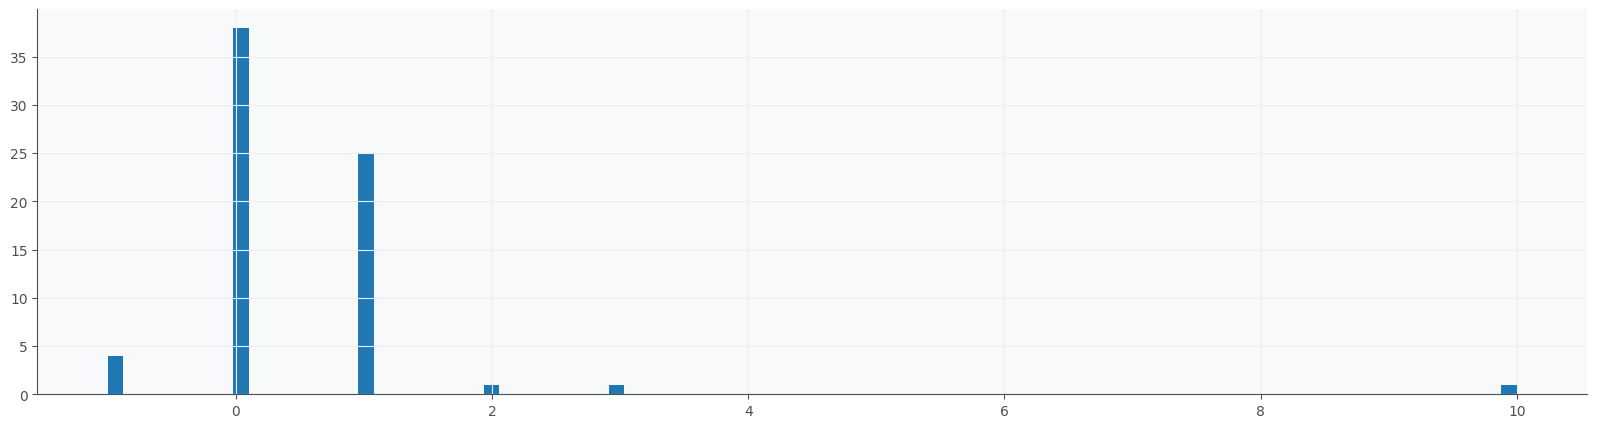

In [6]:
rpeaks_result['nk cnt'] = rpeaks_result['nk'].apply(lambda x : len(x))
rpeaks_result['biosppy cnt'] = rpeaks_result['biosppy'].apply(lambda x : len(x))
rpeaks_result['diff'] = rpeaks_result['nk cnt'] - rpeaks_result['biosppy cnt']
plt.figure(figsize = (20, 5))
_ = plt.hist(rpeaks_result['diff'], bins = 90)

In [7]:
rpeaks_result.loc[['id58']][['nk', 'biosppy']]

,nk,biosppy
id58,"[1950, 3449, 4835, 6117, 7358, 8578, 9812, 111...","[446, 1951, 3449, 4835, 6117, 7359, 8578, 9812..."


In [8]:
a = rpeaks_result[rpeaks_result['diff'] == 0]
a['nk'] = a['nk'].apply(pd.Series).to_numpy()
a['biosppy'] = a['biosppy'].apply(pd.Series).to_numpy()
b = a['nk'] - a['biosppy']
c = pd.DataFrame(b)
c['mean'] = c[0].apply(lambda x : np.mean(x))
abs(c['mean'][abs(c['mean']) < 10]).mean()


/var/folders/d6/jx519p8148n2_2k7m4b6llgr0000gn/T/ipykernel_18634/3161708711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['nk'] = a['nk'].apply(pd.Series).to_numpy()
/var/folders/d6/jx519p8148n2_2k7m4b6llgr0000gn/T/ipykernel_18634/3161708711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['biosppy'] = a['biosppy'].apply(pd.Series).to_numpy()


0.23529411764705882

In [9]:
a = rpeaks_result[rpeaks_result['diff'] == 1][['nk', 'biosppy']]
def last5(row):
    return (row[-5:])
def last4(row):
    return (row[-4:])
a['nk last'] = a['nk'].apply(last5)
a['biosppy last'] = a['biosppy'].apply(last4)
a[['nk last', 'biosppy last']]

,nk last,biosppy last
id8,"[234764, 235923, 237092, 238248, 239346]","[234764, 235923, 237092, 238248]"
id9,"[233537, 234917, 236369, 237841, 239255]","[233536, 234918, 236369, 237841]"
id12,"[234111, 235439, 236712, 237989, 239306]","[234111, 235439, 236711, 237990]"
id15,"[233375, 234950, 236559, 238198, 239815]","[233376, 234950, 236560, 238198]"
id17,"[232890, 234634, 236304, 238007, 239721]","[232890, 234634, 236304, 238007]"
id21,"[234725, 235958, 237210, 238456, 239639]","[234726, 235959, 237210, 238457]"
id24,"[234374, 235682, 236939, 238186, 239356]","[234375, 235682, 236939, 238186]"
id25,"[233875, 235169, 236462, 237806, 239311]","[233875, 235169, 236462, 237807]"
id27,"[233191, 234350, 235918, 237155, 238763]","[234353, 235918, 237161, 238764]"
id35,"[233090, 234867, 236457, 238187, 239803]","[233090, 234868, 236457, 238188]"


In [10]:
len(a)

25

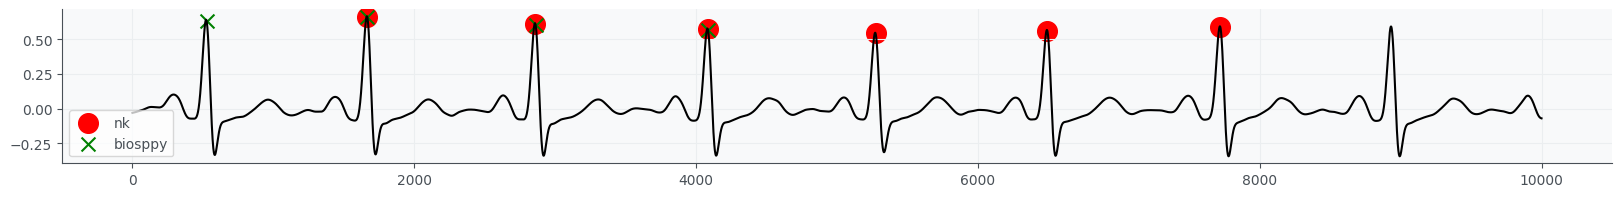

In [11]:
plt.figure(figsize = (20, 2))
sample = rpeaks_result.loc['id10']
plt.plot(range(2000*5), sample['nk filtered'][:2000*5], color = 'black')

x = sample['nk'][:6]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 200, color = 'red', marker = 'o', label = 'nk')

x = sample['biosppy'][:4]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 100, color = 'green', marker = 'x', label = 'biosppy')

plt.legend(fontsize = 10, loc = 'lower left')

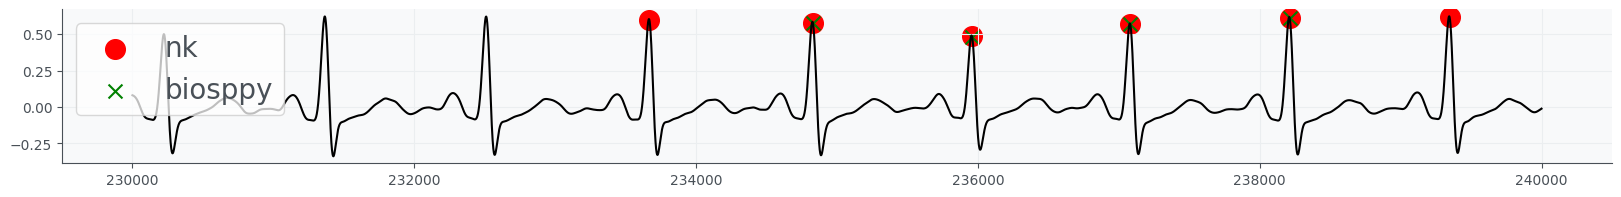

In [12]:
plt.figure(figsize = (20, 2))
sample = rpeaks_result.loc['id10']
plt.plot(range(240000 - 2000*5, 240000), sample['nk filtered'][-2000*5:], color = 'black')

x = sample['nk'][-6:]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 200, color = 'red', marker = 'o', label = 'nk')

x = sample['biosppy'][-4:]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 100, color = 'green', marker = 'x', label = 'biosppy')

plt.legend(fontsize = 20, loc = 'upper left')

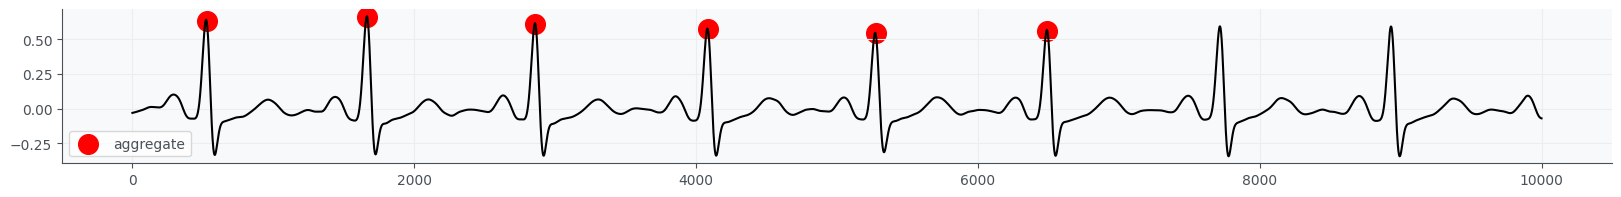

In [13]:
plt.figure(figsize = (20, 2))
sample = new_rpeaks_result.loc['id10']
plt.plot(range(2000*5), sample['nk filtered'][:2000*5], color = 'black')

x = sample['rpeaks'][:6]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 200, color = 'red', marker = 'o', label = 'aggregate')

plt.legend(fontsize = 10, loc = 'lower left')

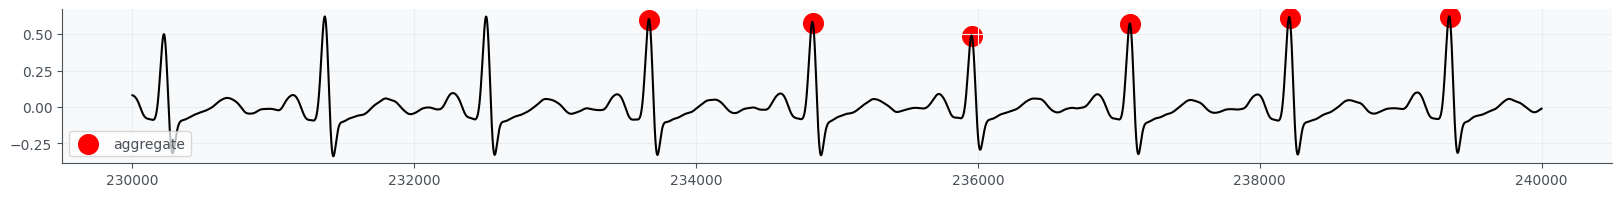

In [14]:
plt.figure(figsize = (20, 2))
sample = new_rpeaks_result.loc['id10']
plt.plot(range(240000 - 2000*5, 240000), sample['nk filtered'][-2000*5:], color = 'black')

x = sample['rpeaks'][-6:]
y = sample['nk filtered'][x]
plt.scatter(x, y, s = 200, color = 'red', marker = 'o', label = 'aggregate')

plt.legend(fontsize = 10, loc = 'lower left')

In [15]:
rpeaks_result.loc['id10']

nk                  [1667, 2860, 4083, 5273, 6493, 7720, 8934, 101...
nk filtered         [-0.030247309281119725, -0.030025681839235173,...
biosppy             [526, 1667, 2861, 4084, 5274, 6493, 7721, 8935...
biosppy filtered    [-0.001320414652636803, -0.0015155661525807324...
nk cnt                                                            200
biosppy cnt                                                       200
diff                                                                0
Name: id10, dtype: object

In [16]:
new_rpeaks_result.loc['id10']

rpeaks              [526, 1667, 2860, 4083, 5273, 6493, 7720, 8934...
nk filtered         [-0.030247309281119725, -0.030025681839235173,...
biosppy filtered    [-0.001320414652636803, -0.0015155661525807324...
Name: id10, dtype: object

In [17]:
[2] + [3,4,5]

[2, 3, 4, 5]

## 2. Time Domain

In [18]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = nk_processing(signal, sampling_rate)
    result[id] = time(pro['rpeaks'], 2000)
pd.DataFrame(result).T.describe().loc[['mean', 'std']]

  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv hr,pyhrv rmssd,pyhrv sdnn,nk rmssd,nk sdnn,biosspy hr
mean,86.103708,46.386937,58.128918,46.386937,58.128918,86.103708
std,14.355060,36.538871,30.867618,36.538871,30.867618,14.355060


In [19]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = biosppy_processing(signal, sampling_rate)
    result[id] = time(pro['rpeaks'], 2000)
pd.DataFrame(result).T.describe().loc[['mean', 'std']]

  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv hr,pyhrv rmssd,pyhrv sdnn,nk rmssd,nk sdnn,biosspy hr
mean,85.939615,45.562897,57.095309,45.562897,57.095309,85.928710
std,14.592144,32.620434,24.376787,32.620434,24.376787,14.589446


In [20]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = processing_aggregate(signal, sampling_rate)
    result[id] = time(pro['rpeaks'], 2000)
pd.DataFrame(result).T.describe().loc[['mean', 'std']]

  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv hr,pyhrv rmssd,pyhrv sdnn,nk rmssd,nk sdnn,biosspy hr
mean,86.105970,46.380058,58.139680,46.380058,58.139680,86.105970
std,14.353653,36.531130,30.867678,36.531130,30.867678,14.353653


## 3. Frequency Domain

In [21]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = nk_processing(signal, sampling_rate)
    result_ = dict()
    output = frequency(pro['rpeaks'], 2000)
    result_['pyhrv welch'] = output['pyhrv welch']['fft_ratio']
    result_['pyhrv ar'] = output['pyhrv ar']['ar_ratio']
    result_['nk welch'] = output['nk welch']['HRV_LFHF']
    result_['nk fft'] = output['nk fft']['HRV_LFHF']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv welch,pyhrv ar,nk welch,nk fft
mean,2.280817,0.540583,2.248242,2.256120
std,1.973993,0.017356,1.842207,1.753255


In [22]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = biosppy_processing(signal, sampling_rate)
    result_ = dict()
    output = frequency(pro['rpeaks'], 2000)
    result_['pyhrv welch'] = output['pyhrv welch']['fft_ratio']
    result_['pyhrv ar'] = output['pyhrv ar']['ar_ratio']
    result_['nk welch'] = output['nk welch']['HRV_LFHF']
    result_['nk fft'] = output['nk fft']['HRV_LFHF']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv welch,pyhrv ar,nk welch,nk fft
mean,2.226274,0.539811,2.209379,2.220873
std,2.008345,0.018071,1.904635,1.768604


In [23]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = processing_aggregate(signal, sampling_rate)
    result_ = dict()
    output = frequency(pro['rpeaks'], 2000)
    result_['pyhrv welch'] = output['pyhrv welch']['fft_ratio']
    result_['pyhrv ar'] = output['pyhrv ar']['ar_ratio']
    result_['nk welch'] = output['nk welch']['HRV_LFHF']
    result_['nk fft'] = output['nk fft']['HRV_LFHF']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv welch,pyhrv ar,nk welch,nk fft
mean,2.280190,0.540512,2.234680,2.239182
std,1.974532,0.017602,1.799397,1.725846


## 4. Nonlinear

In [24]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = nk_processing(signal, sampling_rate)
    result_ = dict()
    output = nonlinear(pro['rpeaks'], 2000)
    result_['pyhrv'] = output['pyhrv nonlinear']['sd1/sd2']
    result_['nk'] = output['nk nonlinear']['HRV_SD1SD2']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv,nk
mean,0.429454,0.429454
std,0.210149,0.210149


In [25]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = biosppy_processing(signal, sampling_rate)
    result_ = dict()
    output = nonlinear(pro['rpeaks'], 2000)
    result_['pyhrv'] = output['pyhrv nonlinear']['sd1/sd2']
    result_['nk'] = output['nk nonlinear']['HRV_SD1SD2']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv,nk
mean,0.430829,0.430829
std,0.222202,0.222202


In [26]:
result = dict()
for row in tqdm(raw.iterrows(), total = len(raw)):
    id = row[0]
    sampling_rate = 2000
    signal = row[1].tolist()
    pro = processing_aggregate(signal, sampling_rate)
    result_ = dict()
    output = nonlinear(pro['rpeaks'], 2000)
    result_['pyhrv'] = output['pyhrv nonlinear']['sd1/sd2']
    result_['nk'] = output['nk nonlinear']['HRV_SD1SD2']
    result[id] = result_
pd.DataFrame(result).T.describe().loc[['mean', 'std']]


  0%|          | 0/70 [00:00<?, ?it/s]

,pyhrv,nk
mean,0.429348,0.429348
std,0.210095,0.210095
